In [14]:
u = {ux[x, y], uy[x, y]};
eps := 1 / 2 (Grad[u, {x, y}] + Transpose[Grad[u, {x, y}]]);
sigma[l_, m_] = (l Tr[eps]) IdentityMatrix[2] + (2 m) eps;
problem[l_, mu_] := -Div[sigma[l, mu], {x, y}];

In [18]:
Y = 10^5;
nu = 0.25;
K = Y / (3 (1 - nu));
G = Y / (2 (1 + nu));
lambda = K - 2 / 3 G;
mu = G;

Out[24]:
 
 
 
 
 Out[25]:
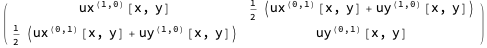
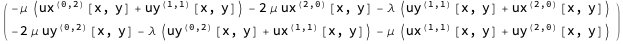

In [24]:
eps // MatrixForm
problem[\[Lambda], \[Mu]] // MatrixForm

In [26]:
mu

40000.

In [27]:
lambda

17777.8

In [28]:
eqs = problem[lambda, mu];

{vfun, ufun, epsFun} = NDSolveValue[{eqs == {0, 0}, 
            {ux[0, y] == uy[0, y] == 0},
            {DirichletCondition[ux[x, y] == 0.05, {x == 1}]}},
            {ux, uy, eps}, {x, 0, 1}, {y, 0, 1}, Method -> {"PDEDiscretization" -> {"FiniteElement", 
      "MeshOptions" -> {"MaxCellMeasure" -> 0.1}, 
      "IntegrationOrder" -> 5}}];
            
sigmaFun = Flatten[(lambda Tr[epsFun]) IdentityMatrix[2] + (2 mu) epsFun];
epsFun = Flatten[epsFun];



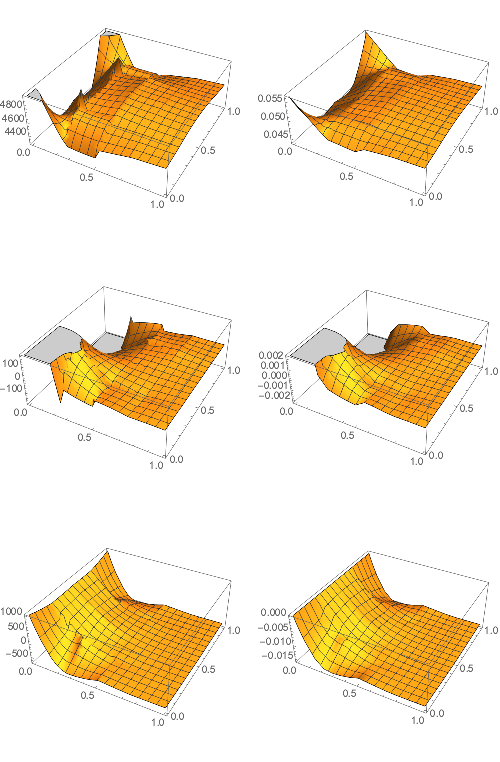

In [33]:
sigmaxx = Plot3D[sigmaFun[[1]], {x, 0, 1}, {y, 0, 1}];
epsxx = Plot3D[Flatten[epsFun][[1]], {x, 0, 1}, {y, 0, 1}];

sigmaxy = Plot3D[sigmaFun[[2]], {x, 0, 1}, {y, 0, 1}];
epsxy = Plot3D[Flatten[epsFun][[2]], {x, 0, 1}, {y, 0, 1}];

sigmayy = Plot3D[sigmaFun[[4]], {x, 0, 1}, {y, 0, 1}];
epsyy = Plot3D[Flatten[epsFun][[4]], {x, 0, 1}, {y, 0, 1}];

GraphicsGrid[{{sigmaxx, epsxx}, {sigmaxy, epsxy}, {sigmayy, epsyy}}, ImageSize-> 500]

Out[41]:
 
 
 
 
 Out[44]:
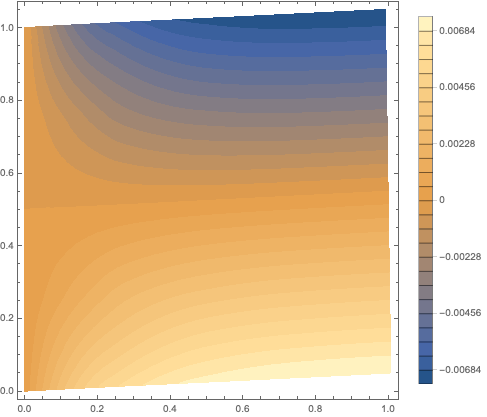
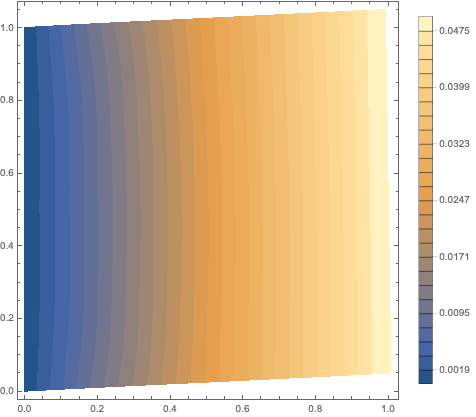

In [40]:
mesh = vfun["ElementMesh"];
g1 = ContourPlot[ufun[x, y], {x, y} \[Element] mesh, 
  AspectRatio -> Automatic, PlotRange -> All, Contours -> 25, 
  ContourLines -> False, ImageSize -> 400, 
  PlotLegends -> 
   Automatic, Axes-> True, AxesLabel->{"x", "y"}] /. (g_Graphics :> ( 
    g /. {x_?NumericQ, y_?NumericQ} :> 
      Chop[(Through[{ufun, vfun}[x, y]] + {x, y})]))
    
(* mesh = vfun["ElementMesh"]; *)
g2 = ContourPlot[vfun[x, y], {x, y} \[Element] mesh, 
  AspectRatio -> Automatic, PlotRange -> All, Contours -> 25, 
  ContourLines -> False, ImageSize -> 400, 
  PlotLegends -> 
   Automatic, Axes-> True, AxesLabel->{"x", "y"}] /. (g_Graphics :> ( 
    g /. {x_?NumericQ, y_?NumericQ} :> 
      Chop[(Through[{ufun, vfun}[x, y]] + {x, y})]))
  
(* GraphicsGrid[{{g1, g2}}, ImageSize->500] *)

In [167]:
(* u1plot = ContourPlot[uif[x, y], {x, 0, 1}, {y, 0, 1}, 
            PlotLabel->"u1", AspectRatio -> Automatic, 
            PlotRange -> All, ColorFunction -> ColorData["LightTemperatureMap"], 
            Contours -> 50, ContourLines -> False, 
            ImageSize -> 600, PlotLegends -> Automatic];
            
u2plot = ContourPlot[vif[x, y], {x, 0, 1}, {y, 0, 1}, 
            PlotLabel->"u2", AspectRatio -> Automatic, PlotRange -> All, 
            ColorFunction -> ColorData["LightTemperatureMap"], Contours -> 50, 
            ContourLines -> False, ImageSize -> 600, PlotLegends -> Automatic]; *)